In [1]:
import numpy as np
import matplotlib.pyplot as plt 



In [2]:
# Input:
size=4

pub_index=[i for i in range(size)]
exp=np.zeros((4,4))


###
exp[0][1]=4
exp[0][2]=1
exp[0][3]=3

exp[1][2]=2
exp[1][3]=1

exp[2][3]=5

exp[1][0]=4
exp[2][0]=1
exp[3][0]=3

exp[2][1]=2
exp[3][1]=1

exp[3][2]=5
###

for i in exp:
    print(i)
    

[0. 4. 1. 3.]
[4. 0. 2. 1.]
[1. 2. 0. 5.]
[3. 1. 5. 0.]


## Classic brut 

In [3]:
# classic imports 

from itertools import permutations
import numpy as np


In [4]:
opt=permutations(pub_index)

for o in opt:
    print(o)

(0, 1, 2, 3)
(0, 1, 3, 2)
(0, 2, 1, 3)
(0, 2, 3, 1)
(0, 3, 1, 2)
(0, 3, 2, 1)
(1, 0, 2, 3)
(1, 0, 3, 2)
(1, 2, 0, 3)
(1, 2, 3, 0)
(1, 3, 0, 2)
(1, 3, 2, 0)
(2, 0, 1, 3)
(2, 0, 3, 1)
(2, 1, 0, 3)
(2, 1, 3, 0)
(2, 3, 0, 1)
(2, 3, 1, 0)
(3, 0, 1, 2)
(3, 0, 2, 1)
(3, 1, 0, 2)
(3, 1, 2, 0)
(3, 2, 0, 1)
(3, 2, 1, 0)


In [5]:
def cost(rut,w):

    dist=0
    for i in range(0,len(rut)-1):
        dist=dist+w[rut[i]][rut[i+1]]
    dist=dist+w[rut[i+1]][rut[0]]
    
    return dist

def get_minim_Brut(w):
    
    opt=permutations(pub_index)
    opt=list(opt)
    mi=cost(opt[0],w)
    solutions=[]
    
    for rut in opt:
        c=cost(rut,w)
        if (mi>c):
            solutions=[]
            solutions.append(rut)
            mi=c
        elif (mi==c):
            solutions.append(rut)
            
    return mi , solutions
        

In [6]:
mi , solutions = get_minim_Brut(exp)

print("min:{}".format(mi))
print("solutions:")
for i in solutions:
    print(i)

min:7.0
solutions:
(0, 2, 1, 3)
(0, 3, 1, 2)
(1, 2, 0, 3)
(1, 3, 0, 2)
(2, 0, 3, 1)
(2, 1, 3, 0)
(3, 0, 2, 1)
(3, 1, 2, 0)


## Quanutm VQE

In [7]:
# imports 

from qiskit import BasicAer, Aer, IBMQ
from qiskit.circuit import QuantumCircuit,QuantumRegister, ParameterVector

from qiskit.tools.visualization import plot_histogram
from qiskit.optimization.applications.ising import tsp
from qiskit.aqua.algorithms import VQE, NumPyMinimumEigensolver
from qiskit.aqua.components.optimizers import COBYLA

# not n
from qiskit.optimization.problems import QuadraticProgram


from qiskit.optimization.algorithms import MinimumEigenOptimizer
exact = MinimumEigenOptimizer(NumPyMinimumEigensolver())

/Users/voicutu/opt/anaconda3/envs/qmap/lib/python3.8/site-packages/qiskit/aqua/__init__.py:86: DeprecationWarning: The package qiskit.aqua is deprecated. It was moved/refactored to qiskit-terra For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua', 'qiskit-terra')
/Users/voicutu/opt/anaconda3/envs/qmap/lib/python3.8/site-packages/qiskit/optimization/__init__.py:92: DeprecationWarning: The package qiskit.optimization is deprecated. It was moved/refactored to qiskit_optimization (pip install qiskit-optimization). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('optimization', 'qiskit_optimization', 'qiskit-optimization')
/Users/voicutu/opt/anaconda3/envs/qmap/lib/python3.8/site-packages/qiskit/aqua/algorithms/minimum_eigen_solvers/minimum_eigen_solver.py:36: DeprecationWarning: The package qiskit.aqua.algorithms.minimum_eigen_solvers is deprecated. It w

In [8]:
class jojo:
    
    def __init__(self,w):
        self.w=w
        self.dim=len(w[0])

In [9]:
qubitOp, offset = tsp.get_operator(jojo(exp))
print('Offset:', offset)
print('Ising Hamiltonian:')
print(qubitOp.print_details())

Offset: 1600032.0
Ising Hamiltonian:
IIIIIIIIIIIIIIIZ	(-200004+0j)
IIIIIIIIIIZIIIII	(-200003.5+0j)
IIIIIIIIIIZIIIIZ	(1+0j)
IIIIIIIIIIIIIIZI	(-200004+0j)
IIIIIIIIIZIIIIII	(-200003.5+0j)
IIIIIIIIIZIIIIZI	(1+0j)
IIIIIIIIIIIIIZII	(-200004+0j)
IIIIIIIIZIIIIIII	(-200003.5+0j)
IIIIIIIIZIIIIZII	(1+0j)
IIIIIIIIIIIIZIII	(-200004+0j)
IIIIIIIIIIIZIIII	(-200003.5+0j)
IIIIIIIIIIIZZIII	(1+0j)
IIIIIIZIIIIIIIII	(-200004+0j)
IIIIIIZIIIIIIIIZ	(0.25+0j)
IIIIIZIIIIIIIIII	(-200004+0j)
IIIIIZIIIIIIIIZI	(0.25+0j)
IIIIZIIIIIIIIIII	(-200004+0j)
IIIIZIIIIIIIIZII	(0.25+0j)
IIIIIIIZIIIIIIII	(-200004+0j)
IIIIIIIZIIIIZIII	(0.25+0j)
IIZIIIIIIIIIIIII	(-200004.5+0j)
IIZIIIIIIIIIIIIZ	(0.75+0j)
IZIIIIIIIIIIIIII	(-200004.5+0j)
IZIIIIIIIIIIIIZI	(0.75+0j)
ZIIIIIIIIIIIIIII	(-200004.5+0j)
ZIIIIIIIIIIIIZII	(0.75+0j)
IIIZIIIIIIIIIIII	(-200004.5+0j)
IIIZIIIIIIIIZIII	(0.75+0j)
IIIIIIIIIIIZIIZI	(1+0j)
IIIIIIIIIIZIIZII	(1+0j)
IIIIIIIIIZIIZIII	(1+0j)
IIIIIIIIZIIIIIIZ	(1+0j)
IIIIIIZIIIIZIIII	(0.5+0j)
IIIIIZIIIIZIIIII	(0.5+0j)
IIIIZII

/Users/voicutu/opt/anaconda3/envs/qmap/lib/python3.8/site-packages/qiskit/optimization/applications/ising/tsp.py:207: DeprecationWarning: The package qiskit.aqua.operators is deprecated. It was moved/refactored to qiskit.opflow (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  return WeightedPauliOperator(paulis=pauli_list), shift


In [10]:
qp = QuadraticProgram()
qp.from_ising(qubitOp, offset, linear=True)
qp.to_docplex().prettyprint()
cq_result = exact.solve(qp)

// This file has been generated by DOcplex
// model name is: AnonymousModel
// single vars section
dvar bool x_0;
dvar bool x_1;
dvar bool x_2;
dvar bool x_3;
dvar bool x_4;
dvar bool x_5;
dvar bool x_6;
dvar bool x_7;
dvar bool x_8;
dvar bool x_9;
dvar bool x_10;
dvar bool x_11;
dvar bool x_12;
dvar bool x_13;
dvar bool x_14;
dvar bool x_15;

minimize
 - 200000 x_0 - 200000 x_1 - 200000 x_2 - 200000 x_3 - 200000 x_4 - 200000 x_5
 - 200000 x_6 - 200000 x_7 - 200000 x_8 - 200000 x_9 - 200000 x_10
 - 200000 x_11 - 200000 x_12 - 200000 x_13 - 200000 x_14 - 200000 x_15 [
 200000 x_0*x_1 + 200000 x_0*x_2 + 200000 x_0*x_3 + 200000 x_0*x_4 + 4 x_0*x_5
 + 4 x_0*x_7 + 200000 x_0*x_8 + x_0*x_9 + x_0*x_11 + 200000 x_0*x_12
 + 3 x_0*x_13 + 3 x_0*x_15 + 200000 x_1*x_2 + 200000 x_1*x_3 + 4 x_1*x_4
 + 200000 x_1*x_5 + 4 x_1*x_6 + x_1*x_8 + 200000 x_1*x_9 + x_1*x_10
 + 3 x_1*x_12 + 200000 x_1*x_13 + 3 x_1*x_14 + 200000 x_2*x_3 + 4 x_2*x_5
 + 200000 x_2*x_6 + 4 x_2*x_7 + x_2*x_9 + 200000 x_2*x_10 + x_2

In [11]:
def convert_to_order(rezult):
    order=[]
    for i in rezult:
        for k in range(len(i)):
            if i[k]==1:
                order.append(k)
    return order

In [12]:
cq_min=cq_result.fval
cq_rezult=cq_result.raw_samples[0].x.reshape((size,size))

rezult=convert_to_order(cq_rezult)

print("mi:{}".format(cq_min))
print(rezult)

mi:7.0
[0, 2, 1, 3]


In [13]:
def geen_1(size,nr_layers):
    
    
    
    nr_q=size*size
    params = ParameterVector('theta',nr_q*2*nr_layers)
    it=0
    
    circ = QuantumCircuit(nr_q)
    #initialize
    for i in range(nr_q):
        circ.h(i)

    for l in range(nr_layers):
        
        for qubit in range(nr_q):
            circ.rx(params[it],qubit)
            circ.rz(params[it],qubit)
        
        #for qubit in range(nr_q-1):
         #   circ.cx(qubit,qubit+1)
            
        circ.barrier()
        
        
    return circ

In [14]:
backend = BasicAer.get_backend("qasm_simulator")
optim = COBYLA(maxiter=1000)

/Users/voicutu/opt/anaconda3/envs/qmap/lib/python3.8/site-packages/qiskit/aqua/components/optimizers/optimizer.py:49: DeprecationWarning: The package qiskit.aqua.components.optimizers is deprecated. It was moved/refactored to qiskit.algorithms.optimizers (pip install qiskit-terra). For more information see <https://github.com/Qiskit/qiskit-aqua/blob/main/README.md#migration-guide>
  warn_package('aqua.components.optimizers',


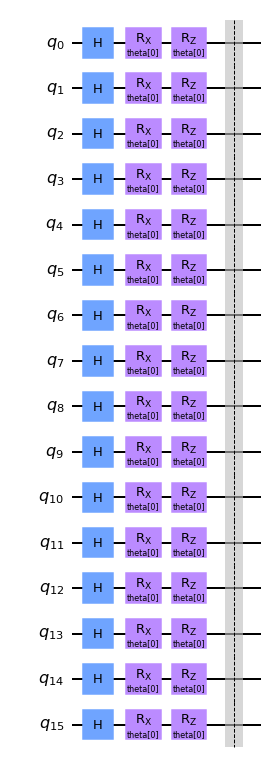

In [15]:
ex_1=geen_1(size,nr_layers=1)
ex_1.draw('mpl')

In [18]:
vqe = VQE(qubitOp, var_form=ex_1, optimizer=optim)
job=vqe.run(backend)

In [19]:
vqe_result = np.real(job['eigenvalue'] ) 

In [21]:
job.e

-1590657.1259765625